<a href="https://colab.research.google.com/github/Loki-33/TS/blob/main/Time_Series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
import numpy as np

In [2]:
from statsmodels.datasets import sunspots

In [25]:
help(sunspots)

Help on package statsmodels.datasets.sunspots in statsmodels.datasets:

NAME
    statsmodels.datasets.sunspots

PACKAGE CONTENTS
    data

FUNCTIONS
    load()
        Load the yearly sunspot data and returns a data class.

        Returns
        -------
        Dataset
            See DATASET_PROPOSAL.txt for more information.

        Notes
        -----
        This dataset only contains data for one variable, so the attributes
        data, raw_data, and endog are all the same variable.  There is no exog
        attribute defined.

    load_pandas()

DATA
    COPYRIGHT = 'This data is public domain.'
    DESCRLONG = 'Yearly (1700-2008) data on sunspots from the National\nGe...
    DESCRSHORT = 'Yearly (1700-2008) data on sunspots from the National\nG...
    NOTE = "::\n\n    Number of Observations - 309 (Annual 170... a 'YEAR'...
    SOURCE = '\nhttp://www.ngdc.noaa.gov/stp/solar/solarda3.htm...yearly.d...
    TITLE = 'Yearly sunspots data 1700-2008'
    __all__ = ['load', 'load_p

In [3]:
data = sunspots.load_pandas().data

In [4]:
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [6]:
data.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [7]:
import matplotlib.pyplot as plt

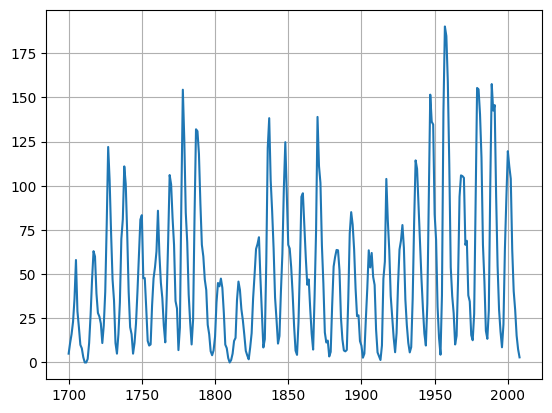

In [11]:
plt.plot(data['YEAR'], data['SUNACTIVITY'])
plt.grid(True)
plt.show()

In [13]:
# simple average method
def average(data):
  return np.mean(series)

aa = data['SUNACTIVITY']
print(average(aa))

49.75210355987054


In [15]:
# moving average
def ma(data, n):
  return np.mean(series[-n:])

ma(data['SUNACTIVITY'], 4)

np.float64(13.85)

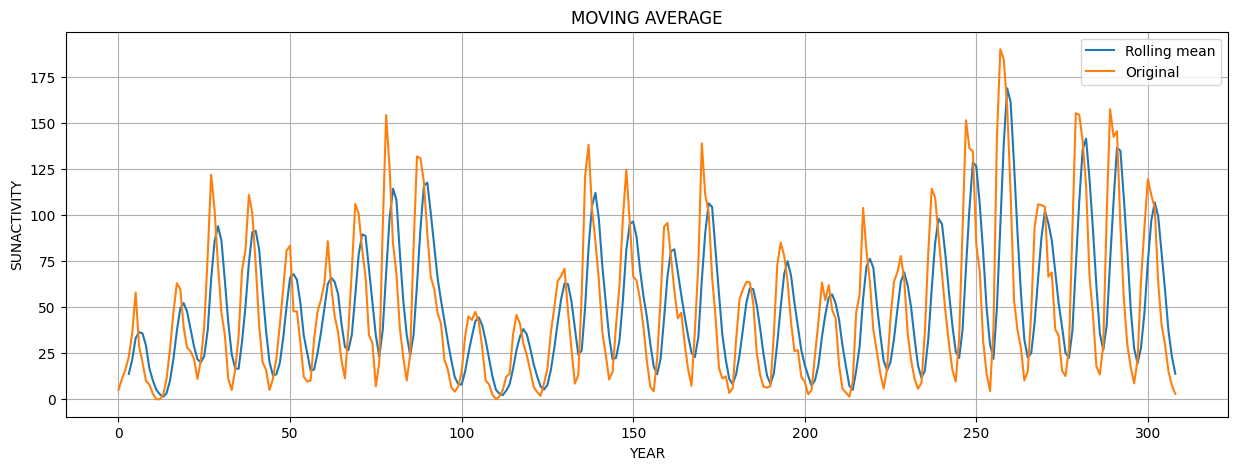

In [29]:
def plot_ma(data, window):
  r_mean = data.rolling(window).mean()

  plt.figure(figsize=(15,5))
  plt.title('MOVING AVERAGE')
  plt.plot(r_mean, label='Rolling mean')
  plt.plot(data, label='Original')
  plt.ylabel('SUNACTIVITY')
  plt.xlabel('YEAR')
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()

plot_ma(data['SUNACTIVITY'], 4)

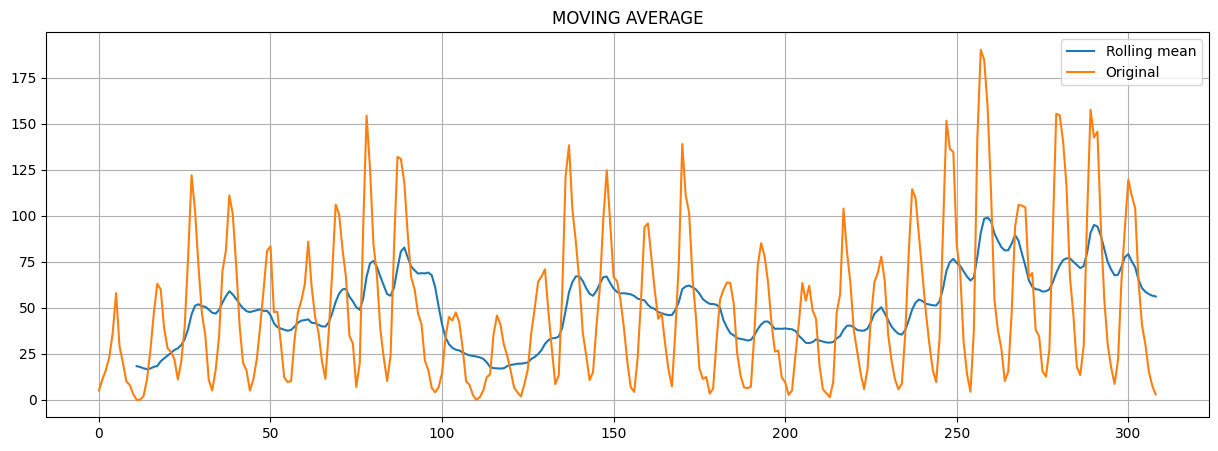

In [26]:
plot_ma(data['SUNACTIVITY'], 12)

In [31]:
data['SUNACTIVITY'].shape

(309,)

In [41]:
# exponential smoothing, exponentially decrease the importance of past values
# alpha value is like a smoothing factor it determines how much importance
# you wanna give to past values, the more the alpha the less the importance of
# past values.
def expo_smoothing(data, alpha):
  data_len = data.shape[0]
  results = np.zeros_like(data)

  results[0] = data[0]
  for i in range(1, len(data)):
    results[i] = alpha * data[i] + (1-alpha) * results[i-1]
  return results

In [51]:
def plot_expo_smoothing(data, alphas):
  plt.figure(figsize=(15,7))
  for alpha in alphas:
    results = expo_smoothing(data, alpha)
    plt.plot(results, label='Alpha {}'.format(alpha))
  plt.title('Exponential Smoothing')
  plt.plot(data, label='Original')
  plt.ylabel('SUNACTIVITY')
  plt.xlabel('YEAR')
  plt.grid(True)
  plt.legend(loc='best')

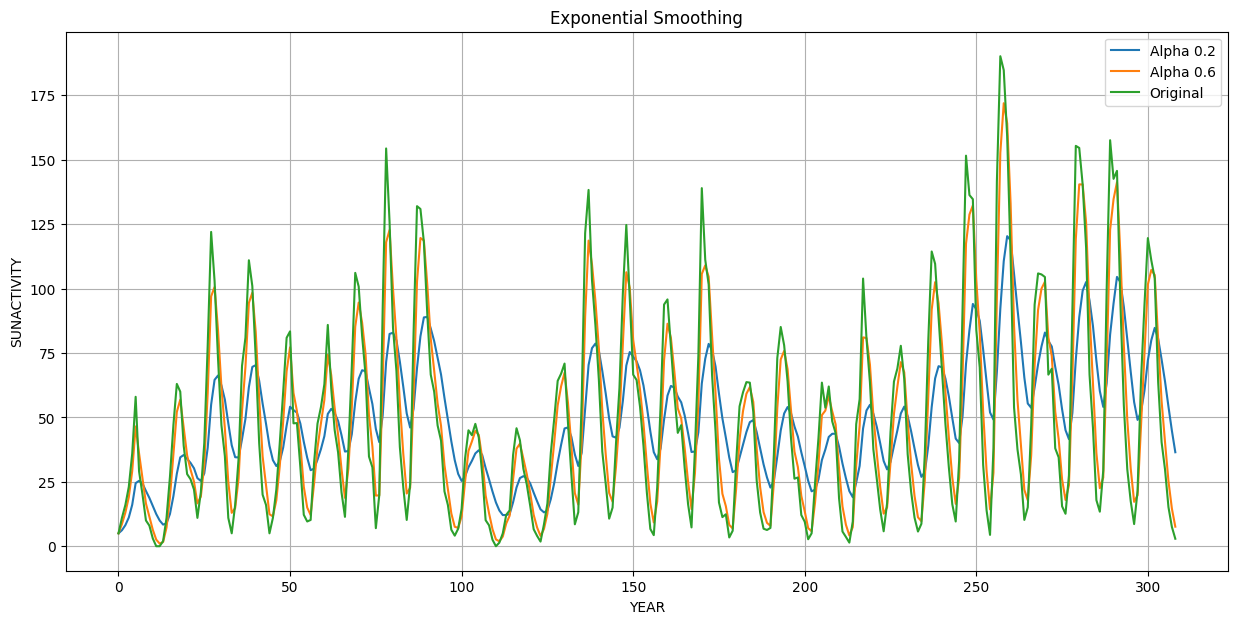

In [52]:
plot_expo_smoothing(data['SUNACTIVITY'], [0.2, 0.6])

In [60]:
# the problem with expo smoothing is that we can only estimate till our current
# observations, not into future as we require current observation

In [61]:
# double exponential smoothing(Holt method)
def double_expo_smoothing(data, alpha, beta, n_preds=2):
  data_len = data.shape[0]
  results = np.zeros(data_len+n_preds)
  results[0] = data[0]

  level = data[0]

  trend = data[1] - data[0]
  for i in range(1, data_len+1):
    if i >= data_len:
      value = results[i-1]
    else:
      value = data[i]

    previous_level = level
    level = alpha * value + (1-alpha) * (level + trend)
    trend = beta * (level - previous_level) + (1-beta) * trend
    results[i] = level + trend

  if n_preds>1:
    results[data_len+1:] = level + np.arange(2, n_preds+1) * trend

  return results

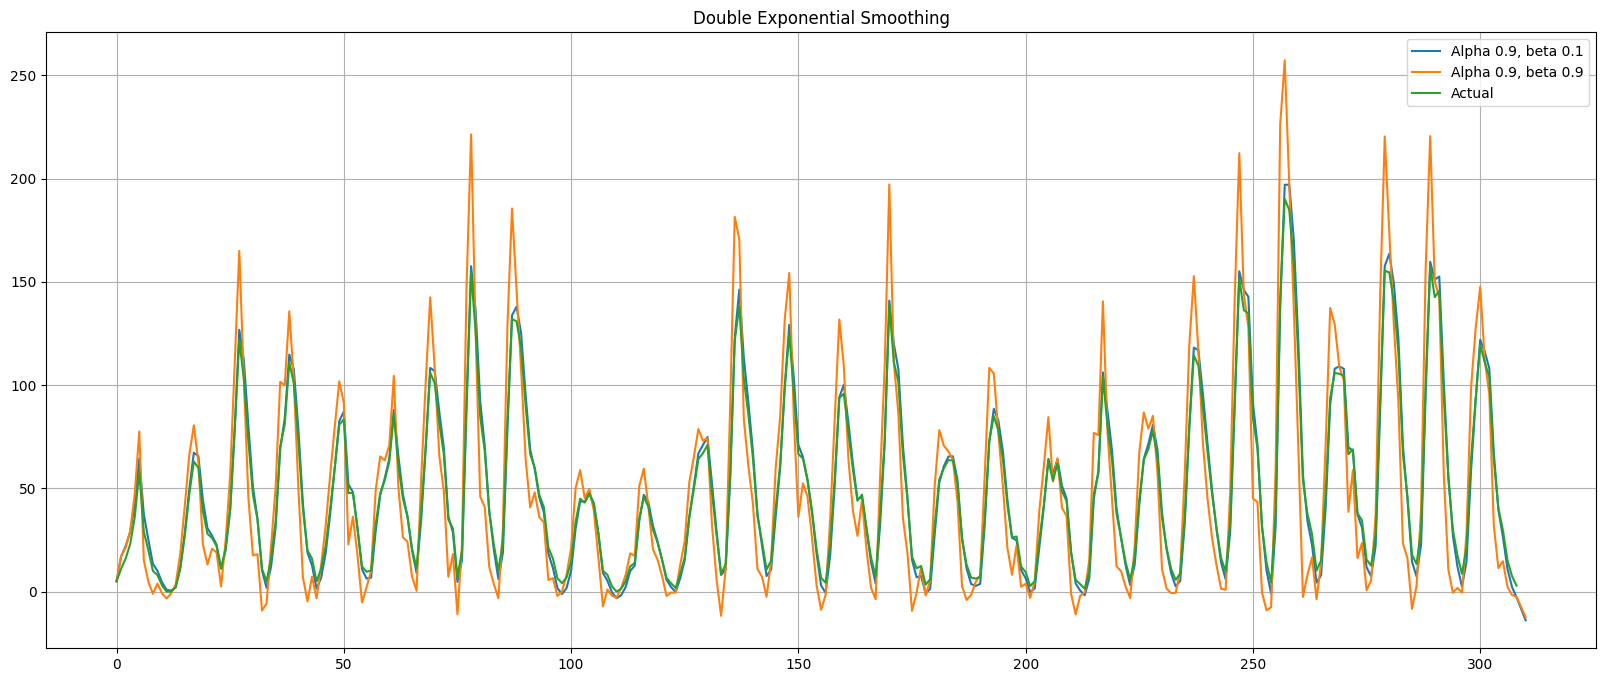

In [62]:
def plot_double_exponential_smoothing(data, alphas, betas):
  plt.figure(figsize=(20, 8))
  for alpha, beta in zip(alphas, betas):
      results = double_expo_smoothing(data, alpha, beta)
      plt.plot(results, label='Alpha {}, beta {}'.format(alpha, beta))

  plt.plot(data, label='Actual')
  plt.legend(loc='best')
  plt.axis('tight')
  plt.title('Double Exponential Smoothing')
  plt.grid(True)

plot_double_exponential_smoothing(data['SUNACTIVITY'].values, alphas=[0.9, 0.9], betas=[0.1, 0.9])

In [63]:
# triple smoothing(Holt-winters method)
def initial_trend(data, season_len):
  total = 0.0
  for i in range(season_len):
    total += (data[i+season_len] - data[i]) / season_len
  return total / season_len

In [69]:
def initial_seasonal_components(data, season_len):
  data_len = data.shape[0]
  n_seasons = data_len // season_len

  season_avg = np.zeros(n_seasons)
  for i in range(n_seasons):
    start = season_len * i
    end = start + season_len
    season_avg[i] = np.sum(data[start:end])/season_len

  seasonals = np.zeros(season_len)
  seasons = np.arange(n_seasons)
  index = seasons * season_len
  for i in range(season_len):
    seasonals[i] = np.sum(data[index+1] - season_avg) / n_seasons

  return seasonals

In [74]:
initial_seasonal_components(data['SUNACTIVITY'], 2)

array([0.02045455, 0.02045455])

In [124]:
class HoltWinters:
  def __init__(self, season_len=3, alpha=0.5, beta=0.5, gamma=0.5):
    self.beta = beta
    self.alpha = alpha
    self.gamma = gamma
    self.season_len = season_len

  def fit(self, series):
    season_len = self.season_len
    seasonals = self._initial_seasonal(series)

    beta = self.beta
    alpha = self.alpha
    gamma = self.gamma
    predictions = []
    smooth = series[0]
    trend = self._initial_trend(series)
    predictions.append(smooth)


    for i in range(1, len(series)):
      value = series[i]
      previous_smooth = smooth
      seasonal = seasonals[i % season_len]
      smooth = self.alpha * value + (1-self.alpha) * (previous_smooth + trend)
      trend = self.beta * (smooth - previous_smooth) + (1-self.beta) * trend
      seasonals[i % season_len] = self.gamma * (value - smooth) + (1-self.gamma) * seasonal
      predictions.append(smooth + trend + seasonal)

    self.trend_ = trend
    self.smooth_ = smooth
    self.seasonals_ = seasonals
    self.predictions_ = predictions
    return self

  def _initial_trend(self, series):
    season_len = self.season_len
    total = 0.0
    for i in range(season_len):
      total += (series[i+season_len] - series[i]) / season_len
    return total / season_len

  def _initial_seasonal(self, series):
    season_len = self.season_len
    n_seasons = len(series) // season_len

    season_avg = np.zeros(n_seasons)

    for i in range(n_seasons):
      start = season_len * i
      end = start + season_len
      season_avg[i] = np.sum(series[start:end])/season_len
    seasonals = np.zeros(season_len)
    seasons = np.arange(n_seasons)
    index = seasons * season_len
    for i in range(season_len):
      seasonals[i] = np.sum(series[index+1] - season_avg) / n_seasons
    return seasonals

  def predict(self, n_preds=10):
    data_len = len(self.predictions_)
    predictions = self.predictions_
    for i in range(data_len, data_len + n_preds):
      m = i - data_len + 1
      prediction = self.smooth_ + m * self.trend_ + self.seasonals_[i % self.season_len]
      predictions.append(prediction)
    return predictions

In [116]:
from sklearn.model_selection import TimeSeriesSplit

In [117]:
# Cross validation split for time series data
# as we cant just use the normal CV split, we will just lose all the temporal structure
# so we gonna use timeseries split which is just take a range of data and just keep on increasing the range
# and split the range into train and test
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
time_series_split = TimeSeriesSplit(n_splits=3)

for train_index, test_index in time_series_split.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [118]:
from scipy.optimize import minimize

In [119]:
def cv_score(params, data, loss_fn, season_len=12, n_splits=3):
  errors = []
  alpha, beta, gamma= params
  time_series_split = TimeSeriesSplit(n_splits=n_splits)

  for train, test in time_series_split.split(data):
    model = HoltWinters(season_len=season_len, alpha=alpha, beta=beta, gamma=gamma)
    model.fit(data[train])

    predictions = model.predict(n_preds=len(test))
    test_pred = predictions[-len(test):]
    errors.append(loss_fn(data[test], test_pred))
  return np.mean(errors)

In [120]:
from sklearn.metrics import mean_squared_log_error

In [125]:
x = [0,0,0.1]
test_size=20
data = series['SUNACTIVITY'].values[:-test_size]
opt = minimize(
    cv_score,
    x0=x,
    args=(data, mean_squared_log_error),
    method='TNC', bounds=((0,1), (0,1), (0,1))
)

print('original parameters: {}'.format(str(x)))
print('best parameters: {}'.format(str(opt.x)))

original parameters: [0, 0, 0.1]
best parameters: [0.04812468 0.01210456 0.        ]


In [126]:
alpha_final, beta_final, gamma_final = opt.x
model = HoltWinters(12, alpha_final, beta_final, gamma_final)
model.fit(data)
predictions = model.predict(n_preds=50)

print('original series length: ', len(data))
print('prediction length: ', len(predictions))

original series length:  289
prediction length:  339


In [127]:
series = sunspots.load_pandas().data

In [132]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true+1e-8))) * 100

In [133]:
mean_absolute_percentage_error(data, predictions[:len(series)])

np.float64(2207594302.868685)

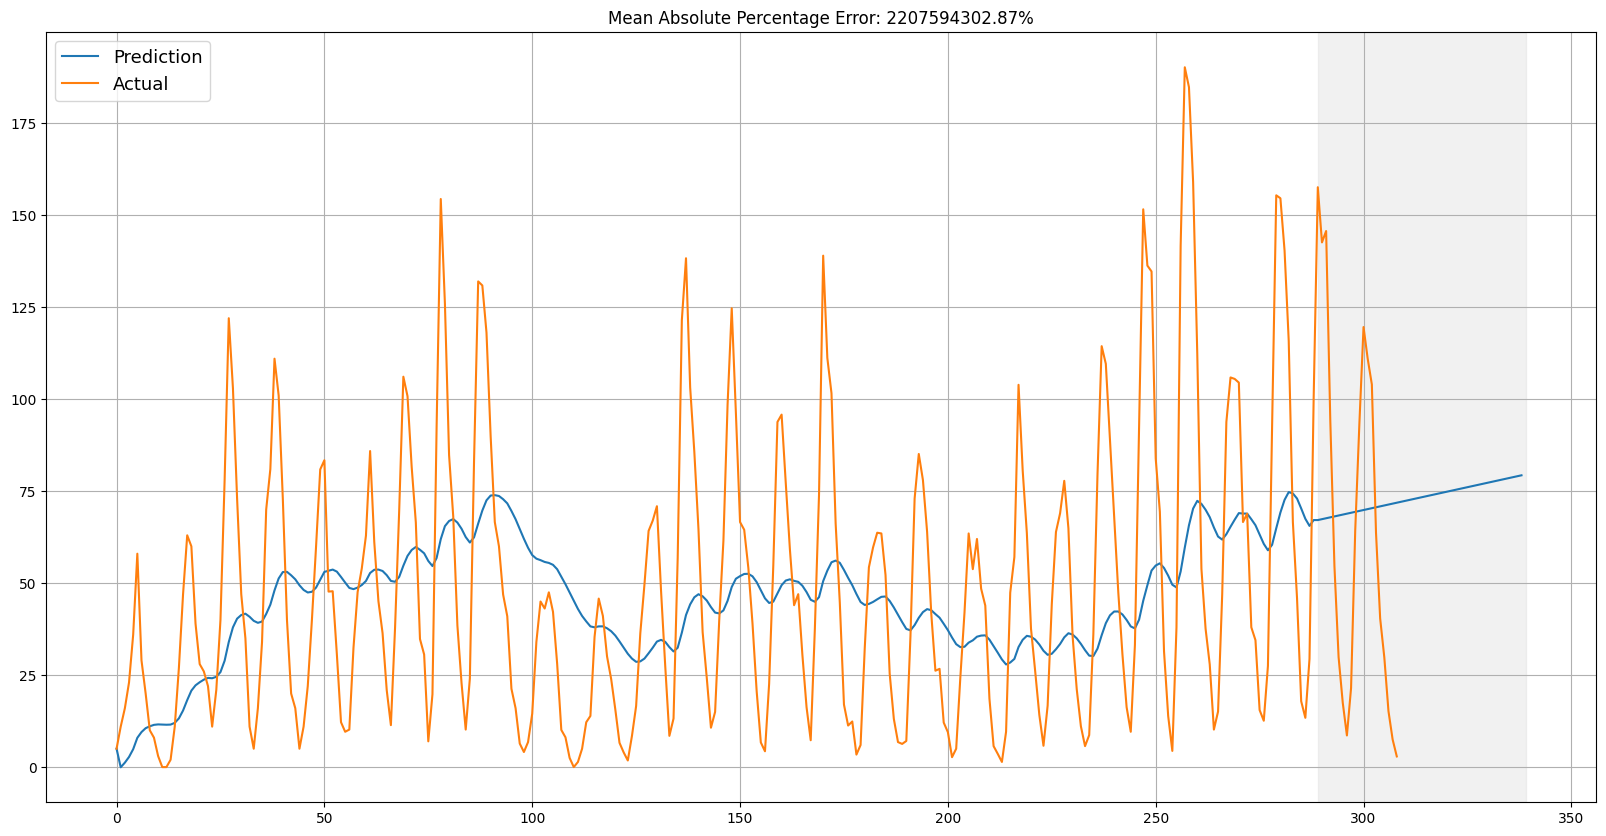

In [134]:
data_len = series['SUNACTIVITY'].shape[0]
data = series['SUNACTIVITY'].values
error = mean_absolute_percentage_error(data, predictions[:len(series)])

plt.figure(figsize=(20, 10))
plt.plot(predictions, label='Prediction')
plt.plot(data, label='Actual')
plt.title('Mean Absolute Percentage Error: {0:.2f}%'.format(error))
plt.axvspan(data_len - test_size, len(predictions), alpha=0.3, color='lightgrey')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='best', fontsize=13)
plt.show()